# 6장 지도 학습: 분류

## 1차원 입력 2클래스 분류

6.1.1  문제 설정

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#데이터 생성
np.random.seed(seed=0)
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'gray']
X = np.zeros(X_n) #입력 데이터
T = np.zeros(X_n , dtype = np.uint8) #목표 데이터
Dist_s = [0.4, 0.8] #분포의 시작 지점
Dist_w = [0.8, 1.6] #분포의 폭
Pi = 0.5 #클래스 0의 비율
for n in range(X_n):
    wk =np.random.rand()
    T[n] = 0 * (wk < Pi) + 1 * (wk >= Pi) #수컷과 암컷을 확률적으로 결정. 암컷이 될 확률 Pi = 0.5, 무작위로 결정
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]] #암컷Dist_s[0] = 0.4에서 폭Dist_w[0]=0.8, 수컷이라면 Dist_s[0] = 0.8에서 폭Dist_w[0] = 1.6
#데이터 표시
print('X = '+str(np.round(X,2)))
print('T='+str(T))


X = [1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


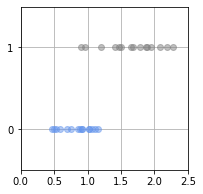

In [2]:
#데이터 분포 표시
def show_data1(x,t):
    K = np.max(t) + 1
    for k in range(K): #k루프 안에 있습니다.
        plt.plot(x[t == k], t[t==k], X_col[k],alpha=0.5, linestyle = 'none', marker = 'o') #분포를 표시
        plt.grid(True)
        plt.ylim(-.5,1.5)
        plt.xlim(X_min, X_max)
        plt.yticks([0,1])
#메인
fig = plt.figure(figsize = (3,3))
show_data1(X,T)
plt.show()

6.1.4 로지스틱 회귀 모델

In [3]:
def logistic(x,w):
    y = 1/(1+np.exp(-(w[0]*x+w[1])))
    return y

1.25

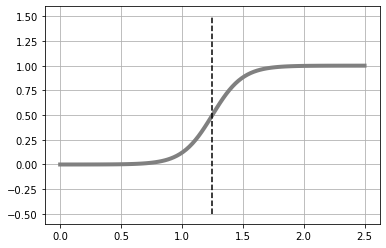

In [4]:
def show_logistic(w):
    xb = np.linspace(X_min, X_max, 100)
    y = logistic(xb, w)
    plt.plot(xb, y , color='gray', linewidth=4)
    # 결정경계
    i = np.min(np.where(y > 0.5)) #요소 번호를 모두 반환하는 명령문
    B = (xb[i -1] + xb[i]) / 2 #y가 0.5을 넘은 직후의 xb[i]와 그 직전의 xb[i-1]의 평균이 결정 경계의 근사치로 B에 저장.
    plt.plot([B,B], [-.5,1.5],color = 'k', linestyle='--')
    plt.grid(True)
    return B

W = [8, -10]
show_logistic(W)

6.1.5 교차 엔트로피 오차

In [5]:
#평균 교차 엔트로피 오차
def cee_logistic(w,x,t):
    y = logistic(x,w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n]* np.log(y[n])+(1 - t[n])*np.log(1 - y[n]))
    cee = cee /X_n
    return cee

# test
W = [1,1]
cee_logistic(W,X,T)

1.0288191541851066

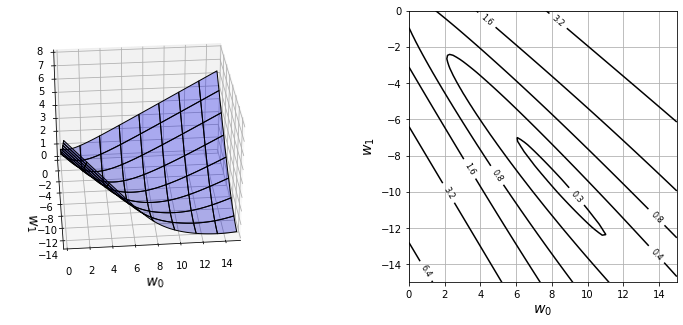

In [6]:
from mpl_toolkits.mplot3d import Axes3D

#계산 
xn = 80 # 등고선 표시 해상도
w_range = np.array([ [0,15], [-15, 0] ])
x0 = np.linspace( w_range[0,0], w_range[0,1], xn )
x1 = np.linspace( w_range[1,0], w_range[1,1], xn )
xx0, xx1 = np.meshgrid(x0, x1)
C = np.zeros( (len(x1), len(x0)) )
w = np.zeros(2)
for i0 in range(xn):
  for i1 in range(xn):
    w[0] = x0[i0]
    w[1] = x1[i1]
    C[i1, i0] = cee_logistic(w, X, T)

# 표시 
plt.figure(figsize=(12,5))
#plt.figure(figsize=(9.5,4))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1,2,1,projection='3d')
ax.plot_surface(xx0, xx1, C, color='blue', edgecolor='black', rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 8)
ax.view_init(30, -95)

plt.subplot(1,2,2)
cont = plt.contour(xx0, xx1, C, 20, colors='black', levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt='%1.1f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()

6.1.6 학습 규칙의 도출

In [7]:
# 평균 교차 엔트로피 오차의 미분 

def dcee_logistic(w,x,t):
  y = logistic(x,w)
  dcee = np.zeros(2)
  for n in range(len(y)):
    dcee[0] = dcee[0] + ( y[n] - t[n] ) * x[n] 
    dcee[1] = dcee[1] + ( y[n] - t[n] )
  dcee = dcee / X_n
  return dcee

# test
W=[1,1]
dcee_logistic(W, X, T)

array([0.30857905, 0.39485474])

6.1.7 경사 하강법에 의한 해

w0 = 8.18, w1 = -9.38
CEE = 0.25
Boundary = 1.15 g


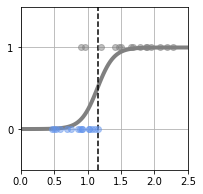

In [8]:
from scipy.optimize import minimize


# 매개 변수 검색
def fit_logistic(w_init, x, t):
    res1 = minimize(cee_logistic, w_init, args=(x, t),
                    jac=dcee_logistic, method="CG") # w_init, args = (x,t)에는 cee_logistic의 w이외의 인수를, 
                    #ac= dcee_logistic에는 미분함수를 지정,method = "CG"로 켤레 기울기법이라는 경사하강법의 일종 지정
    return res1.x


# 메인 
plt.figure(1, figsize=(3, 3))
W_init=[1,-1]
W = fit_logistic(W_init, X, T)
print("w0 = {0:.2f}, w1 = {1:.2f}".format(W[0], W[1]))
B=show_logistic(W)
show_data1(X, T)
plt.ylim(-.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(W, X, T)
print("CEE = {0:.2f}".format(cee))
print("Boundary = {0:.2f} g".format(B))
plt.show()

이 모델의 가장 큰 장점은 출력값이 P(t=1|x)라는 조건부 확률(사후 확률)를 근사하려는 점, 모호성을 포함하여 예측하는 점.